<a href="https://colab.research.google.com/github/phew-phew/Pattern_Recognition/blob/main/Probabilistic_graph_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Probabilistic Graph Model Basics

Drawing moral graph, triangulated graph and the junction tree 

Test Data: http://www.bnlearn.com/bnrepository/asia/asia.bif.gz

citation https://pgmpy.org

https://rstudio-pubs-static.s3.amazonaws.com/338725_a1bc4434cf224c289b298890c9fcf4d8.html


In [2]:
# import wget
# import gzip

In [3]:
# f = wget.download('http://www.bnlearn.com/bnrepository/asia/asia.bif.gz')
# with gzip.open('asia.bif.gz', mode='rb') as f:
#     file_content=f.read()
# with open('asia.bif', mode='wb') as f:
#     f.write(file_content)


In [4]:
# from pgmpy.readwrite import BIFReader
# reader = BIFReader('asia.bif')
# !rm asia.bif
# asia_model = reader.get_model()

In [7]:
!pip install pgmpy  #To install pgmpy in colab

     |████████████████████████████████| 327kB 6.6MB/s 


In [8]:
# Alternative method
# Starting with defining the network structure
import pgmpy
from pgmpy.models import BayesianModel
asia_model = BayesianModel([('asia','tub'),
                               ('smoke','lung'),
                               ('smoke','bronc'),
                               ('tub','either'),
                               ('lung','either'),
                               ('either','xray'),
                               ('bronc','dysp'),
                               ('either','dysp')])

In [9]:
from pgmpy.factors.discrete import TabularCPD

cpd_asia = TabularCPD(variable='asia', variable_card=2,
                      values=[[0.01], [0.99]])

cpd_tub = TabularCPD(variable='tub', variable_card=2,
                     values=[[0.05,0.01],[0.95,0.99]],
                     evidence=['asia'], evidence_card=[2])

cpd_smoke = TabularCPD(variable='smoke', variable_card=2,
                       values=[[0.5],[0.5]])

cpd_lung = TabularCPD(variable='lung', variable_card=2,
                      values=[[0.1,0.01],[0.9,0.99]],
                      evidence=['smoke'], evidence_card=[2])

cpd_bronc = TabularCPD(variable='bronc', variable_card=2,
                       values=[[0.6,0.3],[0.4,0.7]],
                       evidence=['smoke'], evidence_card=[2])

cpd_either = TabularCPD(variable='either', variable_card=2,
                      values=[[1,1,1,0],[0,0,0,1]],
                      evidence=['lung','tub'], evidence_card=[2,2])

cpd_xray = TabularCPD(variable='xray', variable_card=2,
                    values=[[0.98,0.05],[0.02,0.95]],
                    evidence=['either'], evidence_card=[2])

cpd_dysp = TabularCPD(variable='dysp', variable_card=2,
                    values=[[0.9,0.7,0.8,0.1],[0.1,0.3,0.2,0.9]],
                    evidence=['bronc','either'], evidence_card=[2,2])

asia_model.add_cpds(cpd_asia, cpd_tub, cpd_smoke, cpd_lung, cpd_bronc, cpd_either, cpd_xray, cpd_dysp)

In [10]:
asia_model.get_cpds()

[<TabularCPD representing P(asia:2) at 0x7fb17e7a4240>,
 <TabularCPD representing P(tub:2 | asia:2) at 0x7fb17e7a4208>,
 <TabularCPD representing P(smoke:2) at 0x7fb17e7a41d0>,
 <TabularCPD representing P(lung:2 | smoke:2) at 0x7fb17e7a4278>,
 <TabularCPD representing P(bronc:2 | smoke:2) at 0x7fb17e7a42b0>,
 <TabularCPD representing P(either:2 | lung:2, tub:2) at 0x7fb17e7a42e8>,
 <TabularCPD representing P(xray:2 | either:2) at 0x7fb17e7a4320>,
 <TabularCPD representing P(dysp:2 | bronc:2, either:2) at 0x7fb17e7a4358>]

In [11]:
cpds = asia_model.get_cpds()
for cpd in asia_model.get_cpds():
    print("CPD of {variable}:".format(variable=cpd.variable))
    print(cpd)

CPD of asia:
+---------+------+
| asia(0) | 0.01 |
+---------+------+
| asia(1) | 0.99 |
+---------+------+
CPD of tub:
+--------+---------+---------+
| asia   | asia(0) | asia(1) |
+--------+---------+---------+
| tub(0) | 0.05    | 0.01    |
+--------+---------+---------+
| tub(1) | 0.95    | 0.99    |
+--------+---------+---------+
CPD of smoke:
+----------+-----+
| smoke(0) | 0.5 |
+----------+-----+
| smoke(1) | 0.5 |
+----------+-----+
CPD of lung:
+---------+----------+----------+
| smoke   | smoke(0) | smoke(1) |
+---------+----------+----------+
| lung(0) | 0.1      | 0.01     |
+---------+----------+----------+
| lung(1) | 0.9      | 0.99     |
+---------+----------+----------+
CPD of bronc:
+----------+----------+----------+
| smoke    | smoke(0) | smoke(1) |
+----------+----------+----------+
| bronc(0) | 0.6      | 0.3      |
+----------+----------+----------+
| bronc(1) | 0.4      | 0.7      |
+----------+----------+----------+
CPD of either:
+-----------+---------+------

In [12]:
asia_model.nodes()

NodeView(('asia', 'tub', 'smoke', 'lung', 'bronc', 'either', 'xray', 'dysp'))

In [13]:
import networkx as nx
from matplotlib import pyplot as plt
import pydot

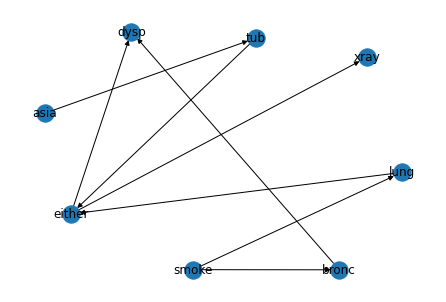

In [14]:
#Given model
nx.draw(asia_model, with_labels=True)
plt.show()

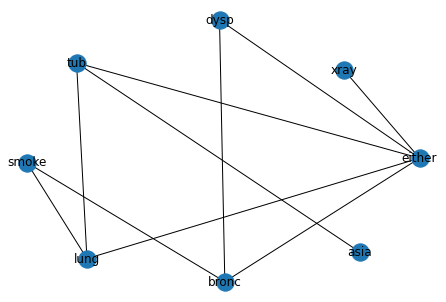

In [15]:
#moralizing the model
moralized = asia_model.to_markov_model()
nx.draw(moralized, with_labels=True)
plt.show()

In [16]:
moralized.add_edge('lung','bronc')

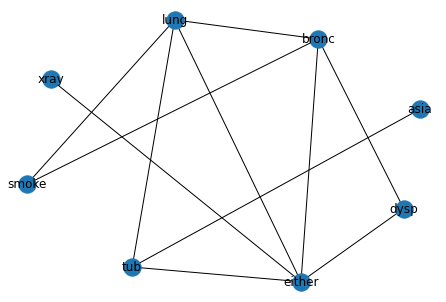

In [17]:
#Triangulating the model
triangulate = moralized.triangulate()
nx.draw(triangulate, with_labels=True)
plt.show()

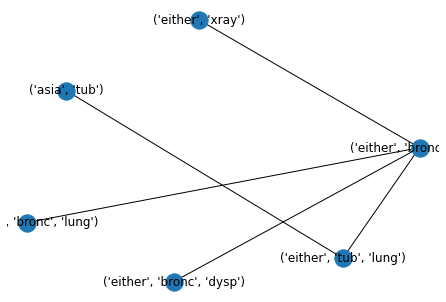

In [18]:
junctiontree = triangulate.to_junction_tree()
nx.draw(junctiontree, with_labels=True)
plt.show()

In [19]:
from pgmpy.inference import Mplp
mplp = Mplp(moralized)
mplp.find_triangles()


[['either', 'bronc', 'lung'],
 ['either', 'bronc', 'dysp'],
 ['either', 'tub', 'lung'],
 ['smoke', 'bronc', 'lung']]

In [20]:
from pgmpy.inference import VariableElimination
infer_a = VariableElimination(asia_model)

In [21]:
rip= infer_a.query(variables=['tub','lung','bronc'],evidence={'asia':0,'xray':0},joint=True)
print(rip)

Eliminating: smoke: 100%|██████████| 3/3 [00:00<00:00, 303.10it/s]

+----------+---------+--------+-----------------------+
| bronc    | lung    | tub    |   phi(bronc,lung,tub) |
+==========+=========+========+=======================+
| bronc(0) | lung(0) | tub(0) |                0.0106 |
+----------+---------+--------+-----------------------+
| bronc(0) | lung(0) | tub(1) |                0.2021 |
+----------+---------+--------+-----------------------+
| bronc(0) | lung(1) | tub(0) |                0.1413 |
+----------+---------+--------+-----------------------+
| bronc(0) | lung(1) | tub(1) |                0.1370 |
+----------+---------+--------+-----------------------+
| bronc(1) | lung(0) | tub(0) |                0.0079 |
+----------+---------+--------+-----------------------+
| bronc(1) | lung(0) | tub(1) |                0.1508 |
+----------+---------+--------+-----------------------+
| bronc(1) | lung(1) | tub(0) |                0.1778 |
+----------+---------+--------+-----------------------+
| bronc(1) | lung(1) | tub(1) |                0

Running intersection property: if the tree belong to two cliques Ci and Cj it must also be included in all the cliques in the path that connects Ci and Cj. In the above junction Tree for each pair of clusters B and C that contain i, each cluster on the unique path between B and C also contains i.

The clique/cluster model pair [Bronc,either,smoke] and [lung,tub,either] has the common variable either also similarly clusters [bronc,either,smoke] and [either,xray] have a cluster [bronc, either, smoke] have [bronc,either,smoke] in their path and has either as common between them. This serves as the proof for the running intersection property.
The joint probablity of tub,lung,bronc = yes given asia = yes and xray = yes is 0.0106

------------------------------------------------------------------------------------------------------
Applying message passing algorithm on the junction tree we get the following results.

In [22]:
infer = VariableElimination(junctiontree)
PA = infer.query(['asia'])
print('P(A)=',PA)
P_TA = infer.query(['tub'],evidence={'asia':1})
print('P(T|A)=',P_TA)
P_S = infer.query(['smoke'])
print('P(S)=',P_S)
P_LS = infer.query(['lung'],evidence={'smoke':1})
print('P(L|S)=',P_LS)
P_BS = infer.query(['bronc'],evidence={'smoke':1})
print('P(B|S)=',P_BS)
P_E_TL = infer.query(['either'],evidence={'tub':1,'lung':1})
print('P(E|T,L)=',P_E_TL)
P_D_EB = infer.query(['dysp'],evidence={'either':1,'bronc':1})
print('P(D|E,B)=',P_D_EB)
P_XE = infer.query(['xray'],evidence={'either':1})
print('P(X|E)=',P_XE)

  0%|          | 0/6 [00:00<?, ?it/s]

P(A)= +---------+-------------+
| asia    |   phi(asia) |
+=========+=============+
| asia(0) |      0.0100 |
+---------+-------------+
| asia(1) |      0.9900 |
+---------+-------------+
P(T|A)= +--------+------------+
| tub    |   phi(tub) |
+========+============+
| tub(0) |     0.0099 |
+--------+------------+
| tub(1) |     0.9801 |
+--------+------------+
P(S)= +----------+--------------+
| smoke    |   phi(smoke) |
+==========+==============+
| smoke(0) |       0.5000 |
+----------+--------------+
| smoke(1) |       0.5000 |
+----------+--------------+
P(L|S)= +---------+-------------+
| lung    |   phi(lung) |
+=========+=============+
| lung(0) |      0.0050 |
+---------+-------------+
| lung(1) |      0.4950 |
+---------+-------------+
P(B|S)= +----------+--------------+
| bronc    |   phi(bronc) |
+==========+==============+
| bronc(0) |       0.1500 |
+----------+--------------+
| bronc(1) |       0.3500 |
+----------+--------------+
P(E|T,L)= +-----------+---------------+


Eliminating: smoke: 100%|██████████| 6/6 [00:00<00:00, 521.89it/s]

P(X|E)= +---------+-------------+
| xray    |   phi(xray) |
+=========+=============+
| xray(0) |      0.0500 |
+---------+-------------+
| xray(1) |      0.9500 |
+---------+-------------+


In [23]:
print(infer.query(['lung'], evidence = {'asia': 1, 'xray': 1}))

Eliminating: either: 100%|██████████| 5/5 [00:00<00:00, 240.33it/s]

+---------+-------------+
| lung    |   phi(lung) |
+=========+=============+
| lung(0) |      0.0011 |
+---------+-------------+
| lung(1) |      0.8801 |
+---------+-------------+


In [24]:
print(infer.query(['lung'], evidence = {'asia': 1, 'xray': 1}))

Eliminating: either: 100%|██████████| 5/5 [00:00<00:00, 400.48it/s]

+---------+-------------+
| lung    |   phi(lung) |
+=========+=============+
| lung(0) |      0.0011 |
+---------+-------------+
| lung(1) |      0.8801 |
+---------+-------------+
